## BASIC FEED FORWARD NETWORK : UNDERSTANDING KERAS

Objective is to create a rudimentary neural network class capable of performing a basic feed-forward operation. We'll initialise the network with weights and biases and implement the feed-forward mechanism using a simple activation function, the sigmoid function.

To validate the correctness of our implementation, we'll recreate a similar neural network using the Keras library, a popular high-level neural networks API.

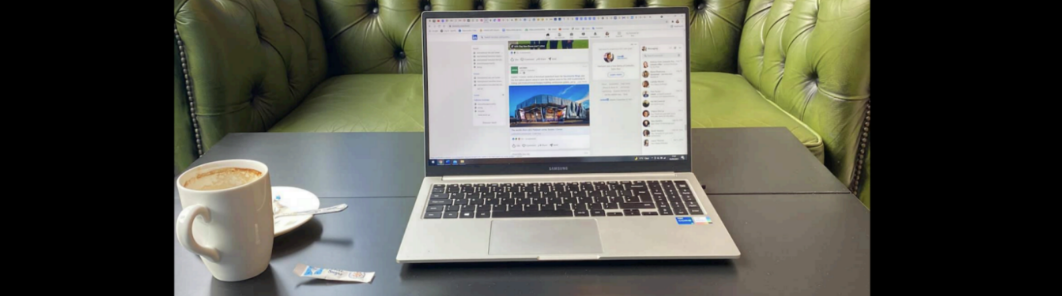

#### Hemant Thapa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf

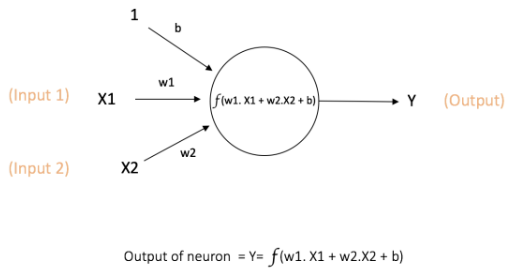

The sigmoid function, also known as the logistic function, is a commonly used activation function in neural networks. It transforms any real-valued number into a value between 0 and 1. The formula for the sigmoid function is as follows:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

where:
- \(e\) is the base of the natural logarithm (approximately 2.71828).
- \(x\) is the input to the function.

In [2]:
def sigmoid(x_value):
    #formula for sigmoid function
    return 1/(1 + np.exp(-x_value))

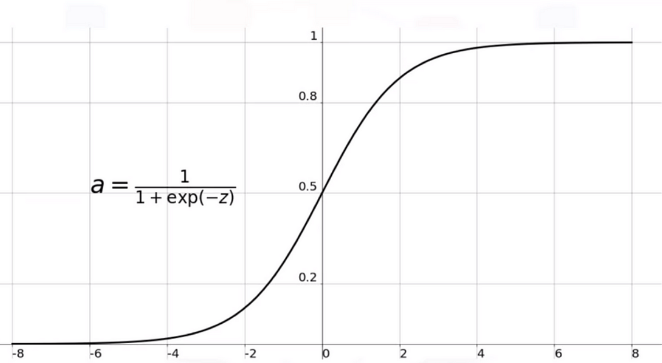


The sigmoid function takes the input $x$, exponentiates it using the natural logarithm base, negates the result, adds 1, and then takes the reciprocal. This process results in an output bounded between 0 and 1. As $x$ becomes very large, $e^{-x}$ approaches 0, and $f(x)$ approaches 1. As $x$ becomes very small and negative, $e^{-x}$ becomes large, and $f(x)$ approaches 0.

In a neural network, the sigmoid function is often used to introduce non-linearity into the model, allowing it to learn complex patterns and relationships in the data. It is particularly useful in the output layer of binary classification problems, where the goal is to predict a probability between 0 and 1.


```
Neural Network
│
├── Activation Function: sigmoid(x)
│
├── Simple_Neural_Net Class
│   ├── Initialization (__init__)
│   └── Feedforward (feedforward)
│
└── Example Usage
    ├── Setting up a Neuron
    └── Input Values and Output
```

In [3]:
#Neural Net
class Simple_Neural_Net:
    #weight and bias
    def __init__(self, weight, bias):
        self.weight = weight
        self.bias   = bias
    #feed forward
    def feed_forward(self, data_input):
        weighted_sum = np.dot(self.weight, data_input) + self.bias
        print(f'Weighted Sum: {weighted_sum}')
        print(f'Output: {sigmoid(weighted_sum)}')

1. **Individual Weighted Inputs:**
   - $ x_1 \rightarrow x_1 \cdot w_1 $
   - $ x_2 \rightarrow x_2 \cdot w_2 $

This represents the multiplication of each input ($x_1$ and $x_2$) by their corresponding weights ($w_1$ and $w_2$).

2. **Summation with Bias:**
   - $ \text{Weighted Sum} = (x_1 \cdot w_1) + (x_2 \cdot w_2) + b $
  
 This is the sum of the weighted inputs along with the bias term ($b$).


3. **Activation Function:**
   - $ y = f(\text{Weighted Sum}) $

   Here, $ f() $ is the activation function. In the example you provided, the sigmoid function is used as the activation function.


In [4]:
#2-input neuron that uses the sigmoid activation function
#weight_1 = 0
#weight_2 = 1
input_weights = np.array([0, 1]) 

In [5]:
#random bias term set to 4
bias_term = 4 

- Weights ($ \mathbf{w} $): [0, 1]
- Bias ($ b $): 4

   $ \mathbf{w} = [0, 1] $


In [6]:
#x1 = 10
#x2 = 11
input_values = np.array([10, 12])

- Input ($ \mathbf{x} $): [10, 12]

   $ \mathbf{x} = [10, 12] $

In [7]:
#Simple_Neural_Net class with specified input weights and bias
neuron = Simple_Neural_Net(input_weights, bias_term)

- Calculate the weighted sum ($ \mathbf{w} \cdot \mathbf{x} + b $):

   $ \text{Weighted Sum} = [0, 1] \cdot [10, 12] + 4 = 0 \cdot 10 + 1 \cdot 12 + 4 = 16 $

In [8]:
neuron.feed_forward(input_values)

Weighted Sum: 16
Output: 0.9999998874648379


- sigmoid activation function

   $ \text{Output} = \sigma(\text{Weighted Sum}) = \frac{1}{1 + e^{-16}} \approx 0.9999998874648379 $


#### Keras for Validation 

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
input_weights = np.array([0, 1])  

In [11]:
bias_term = 4                     

In [12]:
input_values = np.array([10, 12])  

In [13]:
#simple sequential model with one dense layer
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='constant'))

In [14]:
#weights and bias in the model
model.layers[0].set_weights([np.reshape(input_weights, (2, 1)), np.array([bias_term])])

In [15]:
#weights and bias from the model
weights, bias = model.layers[0].get_weights()

In [16]:
#weighted sum
weighted_sum = np.dot(input_values, weights) + bias
#forward pass to get the output
output_result = model.predict(np.array([input_values]))

1/1 [==============================] - 0s 166ms/step


In [17]:
print("Manual Weighted Sum:", weighted_sum)

Manual Weighted Sum: [16.]


In [18]:
print("Output from Model:", output_result)

Output from Model: [[0.9999999]]


### References: 

For more examples and documentation, visit the [official Keras examples page](https://keras.io/examples/).
